In [10]:
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def listToString(s): 
    # initialize an empty string
    str1 = " " 
    # return string  
    return (str1.join(s))
variables = ['est_pct_poverty','est_pct_poc','est_pct_latinx','est_pct_nhblack','est_pct_asianpi',
             'est_pct_native','est_pct_otherpoc',
             'est_pct_renters','est_pct_langisolation',
             'est_pct_elderly','est_pct_under18','est_pct_nocar','est_pct_singparents','pct_novote','dac']
p_dict = {0:"",1:'p<0.1',2:'p<0.05',3:'p<0.01'}
index_order = {'est_pct_poverty':2, 'est_pct_poc':4, 'est_pct_latinx':5,
       'est_pct_nhblack':6, 'est_pct_asianpi':7, 'est_pct_native':8,
       'est_pct_otherpoc':9, 'est_pct_renters':3, 'est_pct_langisolation':10,
       'est_pct_elderly':13, 'est_pct_under18':14, 'est_pct_nocar':11,
       'est_pct_singparents':12, 'dac':0, 'pct_novote':1}

In [3]:
# exposed/non-exposed, population_density
for i in ['exposed_205','exposed_210','eae_exposed_205','eae_exposed_210']:
    print(i)
    try:
        df = pd.read_csv(r'..\Results\%spop_density.csv'%i).reset_index()
    except:
        df = pd.read_csv(r'..\Results\%spop_density.csv'%i,skiprows=1).reset_index()
    df.columns =['index',1,2]
    df['index'] = df['index'].apply(lambda x:x[2:-1])
    n_obs = df.loc[df['index']=='Number of observations',['index',1]].copy().reset_index()
    n_obs[1]=n_obs[1].apply(lambda x:float(x[2:-1]))
    sub_df = df.loc[df['index'].isin(variables)].reset_index()
    sub_df['significance'] = sub_df[1].apply(lambda x:p_dict.get(x.count('*')))
    sub_df[1]=sub_df[1].apply(lambda x:x.replace('*',''))
    sub_df['coef'] = sub_df[1].apply(lambda x:float(x[x.find('"')+1:x.find(' ')])).round(3)
    sub_df['p5'] = sub_df[1].apply(lambda x:float(x[x.find('[')+1:])).round(3)
    sub_df['p95'] = sub_df[2].apply(lambda x:float(x[0:x.find(']')])).round(3)

    sub_df['n_obs'] = n_obs[1]
    sub_df = sub_df[['index','coef','p5','p95','significance','n_obs']]
    print(sub_df)
    sub_df.to_csv(r'..\Results\results_%spop_density.csv'%i)

exposed_205
                    index   coef     p5    p95 significance    n_obs
0         est_pct_poverty  1.260  1.140  1.393       p<0.01  50291.0
1             est_pct_poc  0.993  0.830  1.189               50372.0
2          est_pct_latinx  1.213  1.078  1.365       p<0.01  50372.0
3         est_pct_nhblack  0.900  0.765  1.059               50372.0
4         est_pct_asianpi  0.924  0.858  0.995       p<0.05  50372.0
5          est_pct_native  1.004  0.960  1.049               50372.0
6        est_pct_otherpoc  1.013  0.956  1.074               50545.0
7         est_pct_renters  1.477  1.371  1.592       p<0.01  50372.0
8   est_pct_langisolation  1.193  1.092  1.304       p<0.01  50268.0
9         est_pct_elderly  1.187  1.143  1.233       p<0.01  50268.0
10        est_pct_under18  0.898  0.845  0.954       p<0.01  49608.0
11          est_pct_nocar  1.421  1.278  1.581       p<0.01  50372.0
12    est_pct_singparents  0.992  0.892  1.103               50268.0
13                    

In [4]:
# n exposed facilities with population density
for i in ['n_exposed_205','n_exposed_210']:
    print(i)
    try:
        df = pd.read_csv(r'..\Results\%spop_density.csv'%i).reset_index()
    except:
        df = pd.read_csv(r'..\Results\%spop_density.csv'%i,skiprows=1).reset_index()
    df.columns =['index',1,2]
    df['index'] = df['index'].apply(lambda x:x[2:-1])
    n_obs = df.loc[df['index']=='Number of observations',['index',1]].copy().reset_index()
    n_obs[1]=n_obs[1].apply(lambda x:float(x[2:-1]))
    sub_df = df.loc[df['index'].isin(variables)].reset_index()
    sub_df['significance'] = sub_df[1].apply(lambda x:p_dict.get(x.count('*')))
    sub_df[1]=sub_df[1].apply(lambda x:x.replace('*',''))
    sub_df['coef'] = sub_df[1].apply(lambda x:float(x[x.find('"')+1:x.find(' ')])).round(3)
    sub_df['p5'] = sub_df[1].apply(lambda x:float(x[x.find('[')+1:])).round(3)
    sub_df['p95'] = sub_df[2].apply(lambda x:float(x[0:x.find(']')])).round(3)

    sub_df['n_obs'] = n_obs[1]
    sub_df = sub_df[['index','coef','p5','p95','significance','n_obs']]
    print(sub_df)
    sub_df.to_csv(r'..\Results\results_%spop_density.csv'%i)

n_exposed_205
                    index   coef     p5    p95 significance   n_obs
0         est_pct_poverty  1.066  1.013  1.123       p<0.05  7863.0
1             est_pct_poc  1.106  1.043  1.173       p<0.01  7888.0
2          est_pct_latinx  1.151  1.073  1.234       p<0.01  7888.0
3         est_pct_nhblack  1.029  0.980  1.080               7888.0
4         est_pct_asianpi  0.940  0.881  1.003        p<0.1  7888.0
5          est_pct_native  1.013  0.985  1.043               7888.0
6        est_pct_otherpoc  1.014  0.991  1.039               7951.0
7         est_pct_renters  1.115  1.076  1.155       p<0.01  7888.0
8   est_pct_langisolation  1.042  0.948  1.146               7853.0
9         est_pct_elderly  1.010  0.990  1.030               7853.0
10        est_pct_under18  1.016  0.978  1.056               7766.0
11          est_pct_nocar  1.076  1.017  1.139       p<0.05  7888.0
12    est_pct_singparents  1.061  1.024  1.099       p<0.01  7853.0
13                    dac  1.138  

In [5]:
# exposed/non-exposed, population_density, 3000m
for i in ['exposed_205','exposed_210','eae_exposed_205','eae_exposed_210']:
    print(i)
    try:
        df = pd.read_csv(r'..\Results\%spop_density_3000m.csv'%i).reset_index()
    except:
        df = pd.read_csv(r'..\Results\%spop_density_3000m.csv'%i,skiprows=1).reset_index()
    df.columns =['index',1,2]
    df['index'] = df['index'].apply(lambda x:x[2:-1])
    n_obs = df.loc[df['index']=='Number of observations',['index',1]].copy().reset_index()
    n_obs[1]=n_obs[1].apply(lambda x:float(x[2:-1]))
    sub_df = df.loc[df['index'].isin(variables)].reset_index()
    sub_df['significance'] = sub_df[1].apply(lambda x:p_dict.get(x.count('*')))
    sub_df[1]=sub_df[1].apply(lambda x:x.replace('*',''))
    sub_df['coef'] = sub_df[1].apply(lambda x:float(x[x.find('"')+1:x.find(' ')])).round(3)
    sub_df['p5'] = sub_df[1].apply(lambda x:float(x[x.find('[')+1:])).round(3)
    sub_df['p95'] = sub_df[2].apply(lambda x:float(x[0:x.find(']')])).round(3)

    sub_df['n_obs'] = n_obs[1]
    sub_df = sub_df[['index','coef','p5','p95','significance','n_obs']]
    print(sub_df)
    sub_df.to_csv(r'..\Results\results_%spop_density_3000m.csv'%i)

exposed_205
                    index   coef     p5    p95 significance    n_obs
0         est_pct_poverty  1.304  1.200  1.417       p<0.01  50653.0
1             est_pct_poc  1.038  0.899  1.200               50734.0
2          est_pct_latinx  1.190  1.016  1.393       p<0.05  50734.0
3         est_pct_nhblack  0.945  0.794  1.124               50734.0
4         est_pct_asianpi  0.999  0.886  1.126               50734.0
5          est_pct_native  1.015  0.980  1.050               50734.0
6        est_pct_otherpoc  0.946  0.873  1.025               50909.0
7         est_pct_renters  1.445  1.323  1.577       p<0.01  50734.0
8   est_pct_langisolation  1.248  1.121  1.389       p<0.01  50630.0
9         est_pct_elderly  1.197  1.140  1.257       p<0.01  50630.0
10        est_pct_under18  0.912  0.860  0.967       p<0.01  50304.0
11          est_pct_nocar  1.475  1.251  1.739       p<0.01  50734.0
12    est_pct_singparents  1.018  0.937  1.107               50630.0
13                    

In [6]:
# n exposed facilities with population density with population density, 3000m
for i in ['n_exposed_205','n_exposed_210']:
    print(i)
    try:
        df = pd.read_csv(r'..\Results\%spop_density_3000m.csv'%i).reset_index()
    except:
        df = pd.read_csv(r'..\Results\%spop_density_3000m.csv'%i,skiprows=1).reset_index()
    df.columns =['index',1,2]
    df['index'] = df['index'].apply(lambda x:x[2:-1])
    n_obs = df.loc[df['index']=='Number of observations',['index',1]].copy().reset_index()
    n_obs[1]=n_obs[1].apply(lambda x:float(x[2:-1]))
    sub_df = df.loc[df['index'].isin(variables)].reset_index()
    sub_df['significance'] = sub_df[1].apply(lambda x:p_dict.get(x.count('*')))
    sub_df[1]=sub_df[1].apply(lambda x:x.replace('*',''))
    sub_df['coef'] = sub_df[1].apply(lambda x:float(x[x.find('"')+1:x.find(' ')]))
    sub_df['p5'] = sub_df[1].apply(lambda x:float(x[x.find('[')+1:]))
    sub_df['p95'] = sub_df[2].apply(lambda x:float(x[0:x.find(']')]))

    sub_df['n_obs'] = n_obs[1]
    sub_df = sub_df[['index','coef','p5','p95','significance','n_obs']]
    print(sub_df)
    sub_df.to_csv(r'..\Results\results_%spop_density_3000m.csv'%i)

n_exposed_205
                    index   coef     p5    p95 significance    n_obs
0         est_pct_poverty  1.058  0.971  1.153               20943.0
1             est_pct_poc  1.022  0.921  1.134               20986.0
2          est_pct_latinx  1.112  1.028  1.204       p<0.01  20986.0
3         est_pct_nhblack  0.967  0.885  1.056               20986.0
4         est_pct_asianpi  0.952  0.908  0.999       p<0.05  20986.0
5          est_pct_native  1.014  0.996  1.033               20986.0
6        est_pct_otherpoc  1.027  0.987  1.069               21088.0
7         est_pct_renters  1.140  1.082  1.201       p<0.01  20986.0
8   est_pct_langisolation  1.020  0.923  1.127               20929.0
9         est_pct_elderly  1.038  1.017  1.060       p<0.01  20929.0
10        est_pct_under18  0.987  0.960  1.014               20742.0
11          est_pct_nocar  1.171  1.106  1.240       p<0.01  20986.0
12    est_pct_singparents  1.002  0.936  1.073               20929.0
13                  

In [7]:
star_dict = {'p<0.01':'***','p<0.05':'**','p<0.1':''}
master=pd.DataFrame()
for j in ['exposed_205pop_density','exposed_205pop_density_3000m','exposed_210pop_density','exposed_210pop_density_3000m']:
# for j in ['exposed_205pop_density','exposed_210pop_density']:
    i = r'..\Results\results_%s.csv'%j
    print(i)
    df1 = pd.read_csv(i)
    df1['significance']= df1['significance'].apply(lambda x:x if x is None else star_dict.get(x))
    colname = i.split('\\')[-1].split('.')[0][8:]
    df1[colname ] = df1.apply(lambda x:'%.3f%s/n[%.3f,%.3f]'%(x.coef,x.significance,x.p5,x.p95),axis=1)
    df1[colname ] = df1[colname ].apply(lambda x:x.replace('None',''))
    if len(master.columns)==0:
        master = df1[['index',colname ]]
    else:
        master=master.merge(df1[['index',colname ]],on='index')
master['index_order']=master['index'].apply(lambda x:index_order.get(x))
master = master.sort_values(by='index_order')
master = master.drop(columns='index_order')
master.to_csv(r'..\Results\results_exposed_master.csv',index=False)
master

..\Results\results_exposed_205pop_density.csv
..\Results\results_exposed_205pop_density_3000m.csv
..\Results\results_exposed_210pop_density.csv
..\Results\results_exposed_210pop_density_3000m.csv


,index,exposed_205pop_density,exposed_205pop_density_3000m,exposed_210pop_density,exposed_210pop_density_3000m
13,dac,"1.511***/n[1.231,1.855]","1.685***/n[1.427,1.989]","1.501***/n[1.232,1.828]","1.603***/n[1.344,1.911]"
14,pct_novote,"1.303***/n[1.137,1.493]","1.377***/n[1.240,1.528]","1.359***/n[1.205,1.533]","1.398***/n[1.254,1.558]"
0,est_pct_poverty,"1.260***/n[1.140,1.393]","1.304***/n[1.200,1.417]","1.272***/n[1.162,1.392]","1.271***/n[1.170,1.381]"
7,est_pct_renters,"1.477***/n[1.371,1.592]","1.445***/n[1.323,1.577]","1.414***/n[1.317,1.518]","1.386***/n[1.280,1.501]"
1,est_pct_poc,"0.993/n[0.830,1.189]","1.038/n[0.899,1.200]","1.083/n[0.942,1.245]","1.162**/n[1.026,1.315]"
2,est_pct_latinx,"1.213***/n[1.078,1.365]","1.190**/n[1.016,1.393]","1.215***/n[1.081,1.366]","1.204**/n[1.022,1.419]"
3,est_pct_nhblack,"0.900/n[0.765,1.059]","0.945/n[0.794,1.124]","0.986/n[0.874,1.113]","1.086/n[0.953,1.237]"
4,est_pct_asianpi,"0.924**/n[0.858,0.995]","0.999/n[0.886,1.126]","0.924/n[0.851,1.003]","0.912**/n[0.832,0.999]"
5,est_pct_native,"1.004/n[0.960,1.049]","1.015/n[0.980,1.050]","1.021/n[0.988,1.055]","1.018/n[0.987,1.051]"
6,est_pct_otherpoc,"1.013/n[0.956,1.074]","0.946/n[0.873,1.025]","0.993/n[0.947,1.042]","0.975/n[0.934,1.018]"


In [8]:
star_dict = {'p<0.01':'***','p<0.05':'**','p<0.1':''}
master=pd.DataFrame()
for j in ['n_exposed_205pop_density','n_exposed_205pop_density_3000m','n_exposed_210pop_density','n_exposed_210pop_density_3000m']:
    i = r'..\Results\results_%s.csv'%j
    print(i)
    df1 = pd.read_csv(i)
    df1['significance']= df1['significance'].apply(lambda x:x if x is None else star_dict.get(x))
    colname = i.split('\\')[-1].split('.')[0][8:]
    df1[colname ] = df1.apply(lambda x:'%.3f%s/n[%.3f,%.3f]'%(x.coef,x.significance,x.p5,x.p95),axis=1)
    df1[colname ] = df1[colname ].apply(lambda x:x.replace('None',''))
    if len(master.columns)==0:
        master = df1[['index',colname ]]
    else:
        master=master.merge(df1[['index',colname ]],on='index')
master['index_order']=master['index'].apply(lambda x:index_order.get(x))
master = master.sort_values(by='index_order')
master = master.drop(columns='index_order')
master.to_csv(r'..\Results\Results_n_exposed_master.csv',index=False)
master

..\Results\results_n_exposed_205pop_density.csv
..\Results\results_n_exposed_205pop_density_3000m.csv
..\Results\results_n_exposed_210pop_density.csv
..\Results\results_n_exposed_210pop_density_3000m.csv


,index,n_exposed_205pop_density,n_exposed_205pop_density_3000m,n_exposed_210pop_density,n_exposed_210pop_density_3000m
13,dac,"1.138/n[0.972,1.332]","1.103/n[0.895,1.359]","1.119/n[0.974,1.285]","1.242**/n[1.046,1.474]"
14,pct_novote,"1.124**/n[1.022,1.235]","1.074/n[0.921,1.253]","1.128***/n[1.032,1.234]","1.136/n[0.999,1.290]"
0,est_pct_poverty,"1.066**/n[1.013,1.123]","1.058/n[0.971,1.153]","1.068***/n[1.017,1.122]","1.113***/n[1.034,1.199]"
7,est_pct_renters,"1.115***/n[1.076,1.155]","1.140***/n[1.082,1.201]","1.114***/n[1.072,1.158]","1.165***/n[1.106,1.226]"
1,est_pct_poc,"1.106***/n[1.043,1.173]","1.022/n[0.921,1.134]","1.049/n[0.968,1.137]","1.044/n[0.932,1.170]"
2,est_pct_latinx,"1.151***/n[1.073,1.234]","1.112***/n[1.028,1.204]","1.112***/n[1.056,1.171]","1.143***/n[1.067,1.224]"
3,est_pct_nhblack,"1.029/n[0.980,1.080]","0.967/n[0.885,1.056]","1.001/n[0.940,1.067]","0.970/n[0.886,1.062]"
4,est_pct_asianpi,"0.940/n[0.881,1.003]","0.952**/n[0.908,0.999]","0.932**/n[0.878,0.990]","0.966/n[0.926,1.008]"
5,est_pct_native,"1.013/n[0.985,1.043]","1.014/n[0.996,1.033]","0.989/n[0.957,1.023]","1.012/n[0.990,1.034]"
6,est_pct_otherpoc,"1.014/n[0.991,1.039]","1.027/n[0.987,1.069]","1.001/n[0.971,1.032]","0.986/n[0.946,1.028]"


In [9]:
star_dict = {'p<0.01':'***','p<0.05':'**','p<0.1':''}
master=pd.DataFrame()
for j in ['eae_exposed_205pop_density','eae_exposed_205pop_density_3000m','eae_exposed_210pop_density','eae_exposed_210pop_density_3000m']:
    i = r'..\Results\results_%s.csv'%j
#     print(i)
    df1 = pd.read_csv(i)
    df1['significance']= df1['significance'].apply(lambda x:x if x is None else star_dict.get(x))
    colname = i.split('\\')[-1].split('.')[0][8:]
    df1[colname ] = df1.apply(lambda x:'%.3f%s/n[%.3f,%.3f]'%(x.coef,x.significance,x.p5,x.p95),axis=1)
    df1[colname ] = df1[colname ].apply(lambda x:x.replace('None',''))
    if len(master.columns)==0:
        master = df1[['index',colname ]]
    else:
        master=master.merge(df1[['index',colname ]],on='index')
master['index_order']=master['index'].apply(lambda x:index_order.get(x))
master = master.sort_values(by='index_order')
master = master.drop(columns='index_order')
master.to_csv(r'..\Results\results_eae_exposed_master.csv',index=False)
master

,index,eae_exposed_205pop_density,eae_exposed_205pop_density_3000m,eae_exposed_210pop_density,eae_exposed_210pop_density_3000m
13,dac,"0.075/n[-0.136,0.287]","0.213/n[-0.238,0.664]","0.205/n[-0.058,0.467]","0.640/n[-0.123,1.403]"
14,pct_novote,"0.090/n[-0.014,0.195]","0.161/n[-0.129,0.450]","0.178**/n[0.010,0.346]","0.432/n[-0.154,1.017]"
0,est_pct_poverty,"0.041/n[-0.013,0.095]","0.097/n[-0.054,0.249]","0.102**/n[0.021,0.183]","0.305/n[-0.008,0.618]"
7,est_pct_renters,"0.048**/n[0.010,0.086]","0.184***/n[0.080,0.289]","0.188***/n[0.120,0.255]","0.516***/n[0.298,0.734]"
1,est_pct_poc,"0.071/n[-0.026,0.168]","0.059/n[-0.125,0.242]","0.050/n[-0.095,0.195]","0.053/n[-0.400,0.506]"
2,est_pct_latinx,"0.132/n[-0.036,0.300]","0.257/n[-0.019,0.534]","0.208**/n[0.029,0.387]","0.506***/n[0.143,0.869]"
3,est_pct_nhblack,"0.009/n[-0.049,0.068]","-0.096/n[-0.264,0.072]","-0.058/n[-0.171,0.055]","-0.249/n[-0.621,0.124]"
4,est_pct_asianpi,"-0.060/n[-0.158,0.038]","-0.046/n[-0.182,0.090]","-0.092/n[-0.208,0.025]","-0.045/n[-0.217,0.127]"
5,est_pct_native,"0.026/n[-0.022,0.075]","0.056/n[-0.021,0.134]","0.016/n[-0.030,0.061]","0.060/n[-0.017,0.137]"
6,est_pct_otherpoc,"0.003/n[-0.028,0.033]","0.049/n[-0.024,0.123]","0.015/n[-0.038,0.068]","0.032/n[-0.133,0.197]"


In [11]:
urban = 2 # 1 urban, 0 non-urban, 2 all
pw = 0 # 0 unweighted, 1 weighted
cat_dict = {1:'Power Plants (Nuclear and Fossil Fuel)',2:'Animal Operations',3:'Sewage Treatment Facilities',4:'Hazardous Waste Treatment & Disposal',
            5:'Industrial Facilities (TRI)',6:'Landfills and Incinerators',7:'Clean-up Sites',
           9:'Refineries',10:'Fossil Fuel Ports and Terminals',11:'Formerly Used Defense Sites',18:'Oil & Gas Wells'}
var_dict = {'est_pct_poverty': '% poverty','est_pct_renters':'% renters','est_pct_poc':'% people of color',
            'est_pct_langisolation':'% linguistic isolation','pct_novote':'% non-voters','est_pct_latinx': '% Hispanic',
                'est_pct_nhblack':'% Black',
                'est_pct_asianpi':'% Asian & Pacific Islanders',
                 'est_pct_native':'% Native Americans', 
                'est_pct_otherpoc':'% Other people of color',
               'est_pct_nocar':'% without a car'}
styles = {1:'-.',2:'--',3:'-',4:'-.',5:'-',6:'-',7:'-.',8:'-.',9:'-',10:'-.',18:'--',11:'-'}
colors = {1:'#364759',2:'#5B848F',3:'#C2B37F',4:'#E7C2A0',5:'#B2A0C2',6:'#7F73ED',7:'#5010C8',9:'#AD0599',10:'#DC3C07',18:'#F47D0D',11:'#F7D153'}
cat_order = dict(zip(cat_dict.values(),cat_dict.keys()))

C:\Users\DELL\AppData\Local\Temp/ipykernel_164120/4114073353.py:66: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(r'..\Figures\concentration_plots_n_facilities.jpg',dpi=600,tight_layout=True)


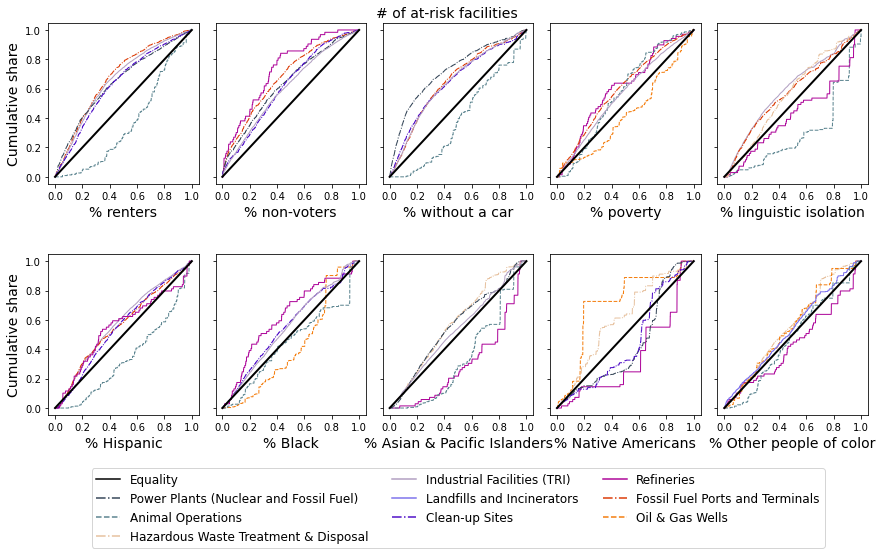

In [15]:
x_list = []
fig = plt.figure(figsize=(12.5,7.5))
gs = gridspec.GridSpec(5, 5)
col=0
# xs = [1,2,5,7,10,18]
variables = ['est_pct_renters','pct_novote','est_pct_nocar','est_pct_poverty','est_pct_langisolation','est_pct_latinx','est_pct_nhblack','est_pct_asianpi',
             'est_pct_native','est_pct_otherpoc']

exp = 'RCP85_Annual_2100'
master_df = pd.DataFrame()
for i in cat_dict.keys():
    df= pd.read_csv(r'D:\Box Sync\Toxic Tides\ToxicTides_US\Regression_results\concerntration_index\ci_count_category%s_pw%s_urban%s.csv'%(i,pw,urban))
    df=df[df['epa_region']=='US']
    df['ans']=df.apply(lambda x:'%.3f[%.3f,%.3f]'%(x.CI,x.lower,x.upper),axis=1)
    df['year']= df['exposure'].apply(lambda x:x.split('_')[-1])
    df=df[['variable','year','ans','CI','lower','upper']]
    df['category']=cat_dict.get(i)
    if len(master_df)==0:
        master_df = df
    else:
        master_df = pd.concat([master_df,df])
master_df['CI_abs'] = master_df['CI'].abs()
master_df['CID'] = master_df['category'].apply(lambda x:list(cat_dict.keys())[list(cat_dict.values()).index(x)])
out = master_df[(master_df['variable'].isin(variables))&(master_df['year']=='2100')][['variable','CI','lower','upper','category']]
out['variable'] = out['variable'].apply(lambda x:var_dict.get(x))
out.to_csv(r'..\Results\Concentration_index_n_exposed_pw%s_urban%s.csv'%(pw,urban))
for var in variables:
    sub = master_df[(master_df['variable']==var)&(master_df['year']=='2100')]
    xs = sub.sort_values(by='CI_abs',ascending=False)['CID'][:5]
    if len(x_list)==0:
        x_list=list(xs.values)
    else:
        x_list = x_list+list(xs.values)
    if col==0:
        ax = fig.add_subplot(gs[2*int(col/5):2*(int(col/5)+1),0])
        ax1=ax
        ax1.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    else:
        ax = fig.add_subplot(gs[2*int(col/5):2*(int(col/5)+1),col%5],sharey=ax1)
        ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    for x in xs:
        df= pd.read_csv(r'D:/Box Sync/Toxic Tides/ToxicTides_US/Regression_results/concerntration_index/ci_details_count_%s_%s_category%s_pw%s_urban%s.csv'%(exp,var,x,pw,urban))
        df.columns = ['id','fractional_rank','outcome']
        df['outcome_cumsum']=df['outcome'].cumsum()
        df['outcome_cumsum'] = df['outcome_cumsum']/df.iloc[-1]['outcome_cumsum']
        df = df.rename(columns={'outcome_cumsum':'Region %s'%x})
        df.plot(x='fractional_rank',y='Region %s'%x,ax=ax,legend=False,style=styles.get(x),c=colors.get(x),linewidth=1)
    ax.set_xlabel('%s'%var_dict.get(var),fontsize=14)
    ax.set_ylabel('Cumulative share',fontsize=14)
    ax.plot([0,1],[0,1],'k',linewidth=2)
    col=col+1


ax=fig.add_subplot(gs[4,0:5])
mlist =[]
for idx in set(x_list):
    m = mlines.Line2D([], [], color=colors.get(idx), linestyle=styles.get(idx),label=cat_dict.get(idx),fillstyle='none')
    mlist.insert(len(mlist),m)
m19 = mlines.Line2D([], [], color='k',linestyle='-',label='Equality',fillstyle='none')
mlist.insert(0,m19)
ax.legend(handles=mlist,fontsize=12,ncol=3,loc=10)
ax.axis('off')
plt.figtext(0.5,1, "# of at-risk facilities", ha="center", va="top", fontsize=14)
# plt.figtext(0.5,0.575, "Expected annual exposure", ha="center", va="top", fontsize=14)
plt.tight_layout(h_pad=3,rect=(0,0,1,0.99))
plt.savefig(r'..\Figures\concentration_plots_n_facilities.jpg',dpi=600,tight_layout=True)

C:\Users\DELL\AppData\Local\Temp/ipykernel_164120/471952931.py:66: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(r'..\Figures\concentration_plots_EAE.jpg',dpi=600,tight_layout=True)


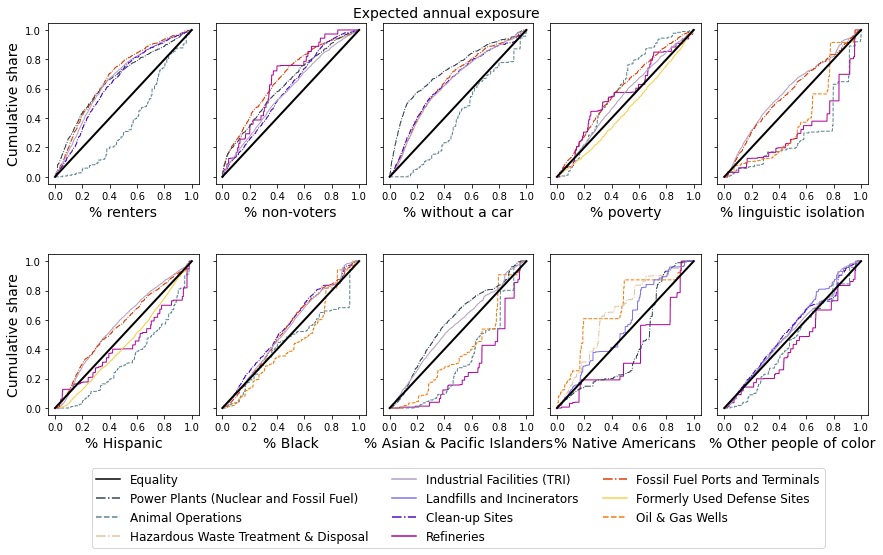

In [16]:
x_list = []
fig = plt.figure(figsize=(12.5,7.5))
gs = gridspec.GridSpec(5, 5)
col=0
# xs = [1,2,5,7,10,18]
variables = ['est_pct_renters','pct_novote','est_pct_nocar','est_pct_poverty','est_pct_langisolation','est_pct_latinx','est_pct_nhblack','est_pct_asianpi',
             'est_pct_native','est_pct_otherpoc']


exp = 'RCP85_Annual_2100'
master_df = pd.DataFrame()
for i in cat_dict.keys():
    df= pd.read_csv(r'D:\Box Sync\Toxic Tides\ToxicTides_US\Regression_results\concerntration_index\ci_eae_category%s_pw%s_urban%s.csv'%(i,pw,urban))
    df=df[df['epa_region']=='US']
    df['ans']=df.apply(lambda x:'%.3f[%.3f,%.3f]'%(x.CI,x.lower,x.upper),axis=1)
    df['year']= df['exposure'].apply(lambda x:x.split('_')[-1])
    df=df[['variable','year','ans','CI','lower','upper']]
    df['category']=cat_dict.get(i)
    if len(master_df)==0:
        master_df = df
    else:
        master_df = pd.concat([master_df,df])
master_df['CI_abs'] = master_df['CI'].abs()
master_df['CID'] = master_df['category'].apply(lambda x:list(cat_dict.keys())[list(cat_dict.values()).index(x)])
out = master_df[(master_df['variable'].isin(variables))&(master_df['year']=='2100')][['variable','CI','lower','upper','category']]
out['variable'] = out['variable'].apply(lambda x:var_dict.get(x))
out.to_csv(r'..\Results\Concentration_index_EAE_pw%s_urban%s.csv'%(pw,urban))
for var in variables:
    sub = master_df[(master_df['variable']==var)&(master_df['year']=='2100')]
    xs = sub.sort_values(by='CI_abs',ascending=False)['CID'][:5]
    if len(x_list)==0:
        x_list=list(xs.values)
    else:
        x_list = x_list+list(xs.values)
    if col==0:
        ax = fig.add_subplot(gs[2*int(col/5):2*(int(col/5)+1),0])
        ax1=ax
        ax1.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    else:
        ax = fig.add_subplot(gs[2*int(col/5):2*(int(col/5)+1),col%5],sharey=ax1)
        ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    for x in xs:
        df= pd.read_csv(r'D:/Box Sync/Toxic Tides/ToxicTides_US/Regression_results/concerntration_index/ci_details_eae_%s_%s_category%s_pw%s_urban%s.csv'%(exp,var,x,pw,urban))
        df.columns = ['id','fractional_rank','outcome']
        df['outcome_cumsum']=df['outcome'].cumsum()
        df['outcome_cumsum'] = df['outcome_cumsum']/df.iloc[-1]['outcome_cumsum']
        df = df.rename(columns={'outcome_cumsum':'Region %s'%x})
        df.plot(x='fractional_rank',y='Region %s'%x,ax=ax,legend=False,style=styles.get(x),c=colors.get(x),linewidth=1)
    ax.set_xlabel('%s'%var_dict.get(var),fontsize=14)
    ax.set_ylabel('Cumulative share',fontsize=14)
    ax.plot([0,1],[0,1],'k',linewidth=2)
    col=col+1
ax=fig.add_subplot(gs[4,0:5])
mlist =[]
for idx in set(x_list):
    m = mlines.Line2D([], [], color=colors.get(idx), linestyle=styles.get(idx),label=cat_dict.get(idx),fillstyle='none')
    mlist.insert(len(mlist),m)
m19 = mlines.Line2D([], [], color='k',linestyle='-',label='Equality',fillstyle='none')
mlist.insert(0,m19)
ax.legend(handles=mlist,fontsize=12,ncol=3,loc=10)
ax.axis('off')
plt.figtext(0.5,1, "Expected annual exposure", ha="center", va="top", fontsize=14)
plt.tight_layout(h_pad=3,rect=(0,0,1,0.99))
plt.savefig(r'..\Figures\concentration_plots_EAE.jpg',dpi=600,tight_layout=True)